# 1. Obtener datos de yfinance

In [97]:
# Instalar librerías

# pip install yfinance
# pip install plotly
# pip install pandas
# pip install numpy
# pip install seaborn

In [98]:
# Importar librerías
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
import seaborn as sns
import datetime

In [99]:
# Definir parámetros
ric = 'TSLA' # 'NQ=F', 'TSLA', 'NVDA', 'AAPL' '^IBEX', 'AMZN', 'BTC=F', 'CL=F', 'EURUSD=X', 'GBPUSD=X', 'BTC-EUR'
interval = '1h' # Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo Intraday data cannot extend last 60 days
period = '730d' # period= 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max

ticker = yf.Ticker(ric)
data = ticker.history(interval=interval, period=period)

In [100]:
# # Definir las fechas de inicio y fin
# start_date = datetime.datetime.now() - datetime.timedelta(days=7)
# end_date = datetime.datetime.now()

# # Obtener los datos históricos con intervalo de 1 minuto utilizando yfinance
# data = yf.download(ric, interval='1m', start=start_date, end=end_date)

# 2. Estudio del dato

In [101]:
# Tipo de variable
type(data)

pandas.core.frame.DataFrame

In [102]:
# Info del dato
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5091 entries, 2020-07-31 09:30:00-04:00 to 2023-06-26 12:30:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          5091 non-null   float64
 1   High          5091 non-null   float64
 2   Low           5091 non-null   float64
 3   Close         5091 non-null   float64
 4   Volume        5091 non-null   int64  
 5   Dividends     5091 non-null   float64
 6   Stock Splits  5091 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 318.2 KB


In [103]:
# Datos
data

Open        High         Low       Close  \
Datetime                                                                    
2020-07-31 09:30:00-04:00  100.517334  100.620003   97.003334   97.921333   
2020-07-31 10:30:00-04:00   97.863663   98.893326   97.333336   98.667336   
2020-07-31 11:30:00-04:00   98.729996   98.933334   95.866669   96.854004   
2020-07-31 12:30:00-04:00   96.866669   96.923325   95.000000   96.364662   
2020-07-31 13:30:00-04:00   96.354759   96.453484   94.793335   95.096069   
...                               ...         ...         ...         ...   
2023-06-23 15:30:00-04:00  255.449997  257.920013  254.679993  256.549988   
2023-06-26 09:30:00-04:00  250.065002  258.369995  250.000000  254.720001   
2023-06-26 10:30:00-04:00  254.729996  255.100006  248.529999  249.320007   
2023-06-26 11:30:00-04:00  249.300003  251.190002  242.649994  243.839996   
2023-06-26 12:30:00-04:00  243.820007  246.630005  243.130005  245.465897   

                             Volume  Dividends  Stock Splits  
Datetime                                                      
2020-07-31 09:30:00-04:00   3024530        0.0           0.0  
2020-07-31 10:30:00-04:00   1603795        0.0           0.0  
2020-07-31 11:30:00-04:00   1679526        0.0           0.0  
2020-07-31 12:30:00-04:00   1967006        0.0           0.0  
2020-07-31 13:30:00-04:00   1178317        0.0           0.0  
...                             ...        ...           ...  
2023-06-23 15:30:00-04:00  13786912        0.0           0.0  
2023-06-26 09:30:00-04:00  41727003        0.0           0.0  
2023-06-26 10:30:00-04:00  30950945        0.0           0.0  
2023-06-26 11:30:00-04:00  28917560        0.0           0.0  
2023-06-26 12:30:00-04:00  19054088        0.0           0.0  

[5091 rows x 7 columns]

In [104]:
# Convertir string a minúsculas
data.columns = data.columns.str.lower()
data = data.loc[:, 'open':'close']

In [105]:
#Descripción de los datos
data.describe()

open         high          low        close
count  5091.000000  5091.000000  5091.000000  5091.000000
mean    233.087353   234.958353   231.111147   233.069498
std      66.332930    66.857109    65.775527    66.295872
min      91.988663    92.050003    91.000000    91.599998
25%     188.870003   190.794998   187.194992   188.945000
50%     228.063293   229.556641   226.103333   227.963333
75%     279.515091   281.331665   277.346680   279.401672
max     413.023315   414.496674   410.566650   412.926666

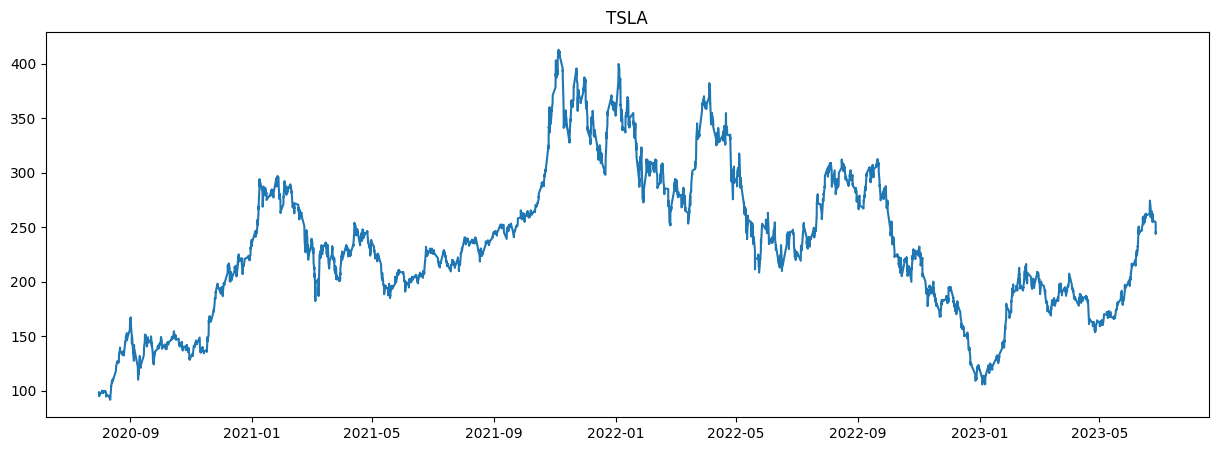

In [106]:
# Plot precio
plt.figure(figsize=(15,5))
plt.plot(data.index, data['close'])
plt.title(f'{ric}')
plt.show()

# 3. Retornos

### 1. Cálculo del retorno al cierre en %

In [107]:
data['return_close'] = data['close'] / data['close'].shift(1) - 1
data

open        high         low       close  \
Datetime                                                                    
2020-07-31 09:30:00-04:00  100.517334  100.620003   97.003334   97.921333   
2020-07-31 10:30:00-04:00   97.863663   98.893326   97.333336   98.667336   
2020-07-31 11:30:00-04:00   98.729996   98.933334   95.866669   96.854004   
2020-07-31 12:30:00-04:00   96.866669   96.923325   95.000000   96.364662   
2020-07-31 13:30:00-04:00   96.354759   96.453484   94.793335   95.096069   
...                               ...         ...         ...         ...   
2023-06-23 15:30:00-04:00  255.449997  257.920013  254.679993  256.549988   
2023-06-26 09:30:00-04:00  250.065002  258.369995  250.000000  254.720001   
2023-06-26 10:30:00-04:00  254.729996  255.100006  248.529999  249.320007   
2023-06-26 11:30:00-04:00  249.300003  251.190002  242.649994  243.839996   
2023-06-26 12:30:00-04:00  243.820007  246.630005  243.130005  245.465897   

                           return_close  
Datetime                                 
2020-07-31 09:30:00-04:00           NaN  
2020-07-31 10:30:00-04:00      0.007618  
2020-07-31 11:30:00-04:00     -0.018378  
2020-07-31 12:30:00-04:00     -0.005052  
2020-07-31 13:30:00-04:00     -0.013165  
...                                 ...  
2023-06-23 15:30:00-04:00      0.004345  
2023-06-26 09:30:00-04:00     -0.007133  
2023-06-26 10:30:00-04:00     -0.021200  
2023-06-26 11:30:00-04:00     -0.021980  
2023-06-26 12:30:00-04:00      0.006668  

[5091 rows x 5 columns]

In [108]:
data['return_close'].describe()

count    5090.000000
mean        0.000280
std         0.014102
min        -0.125704
25%        -0.005530
50%         0.000072
75%         0.005837
max         0.121605
Name: return_close, dtype: float64

### 2. Plots

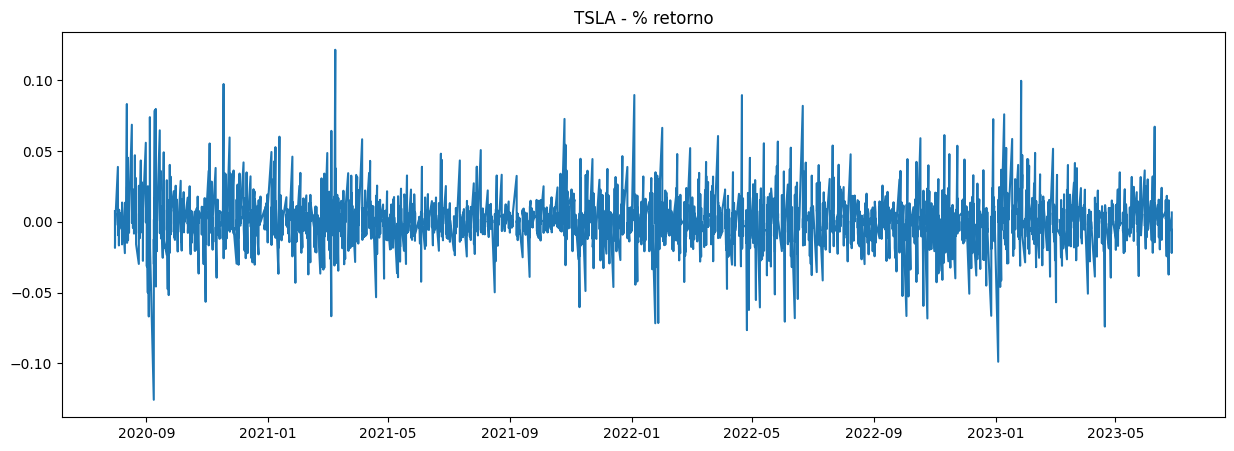

In [109]:
# Plot retornos 

plt.figure(figsize=(15,5))
plt.plot(data['return_close'])
plt.title(f'{ric} - % retorno')
plt.show()


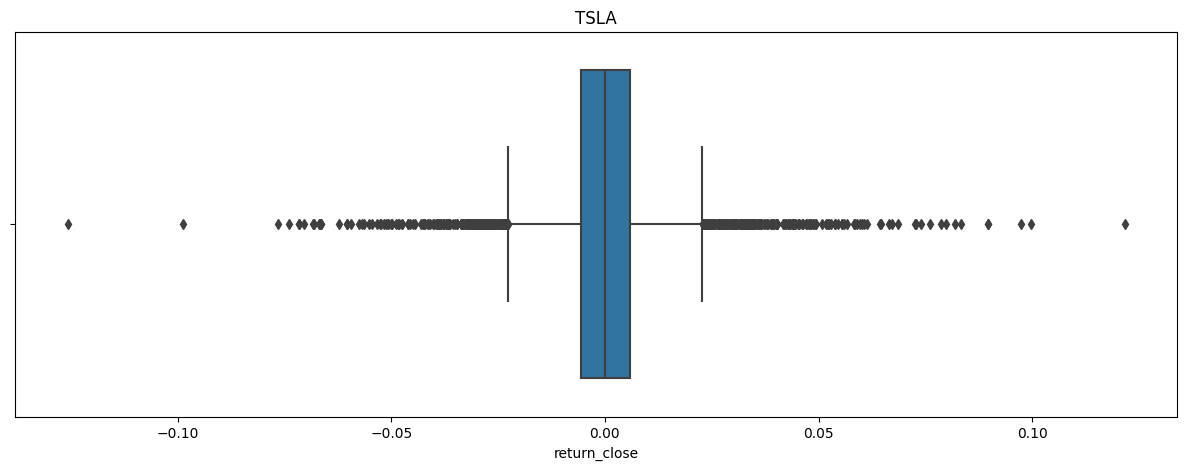

In [110]:
# Boxplot
plt.figure(figsize=(15,5))
sns.boxplot(x=data['return_close'])
plt.title(f'{ric}')
plt.show()

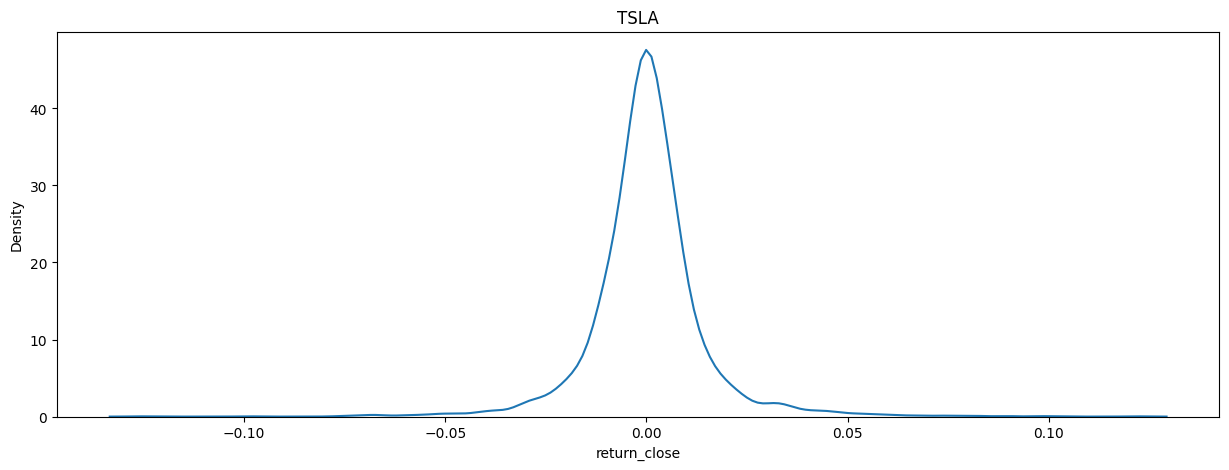

In [111]:
# KDE plot
plt.figure(figsize=(15,5))
sns.kdeplot(data['return_close'])
plt.title(f'{ric}')
plt.show()

# 4 Medias móviles

### 1. Cálculo

In [112]:
# Definir las medias móviles
medias_moviles = [8, 21, 30, 50, 100, 200]

# Calcular las medias móviles
for ma in medias_moviles:
    columna = 'MA_' + str(ma)  # Nombre de la columna de la media móvil
    data[columna] = data['close'].rolling(window=ma).mean()

### 2. Plot

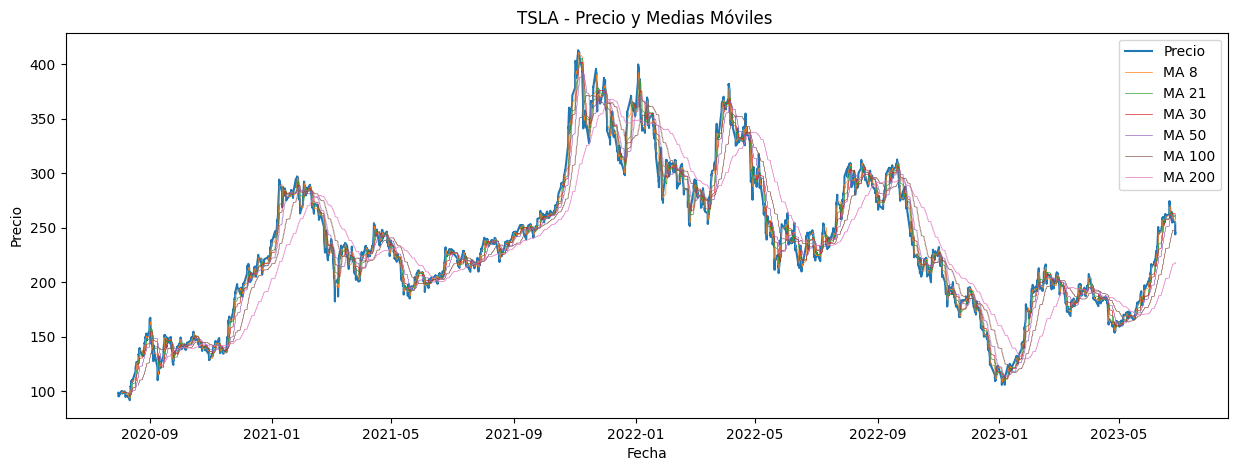

In [113]:
# Graficar el precio y las medias móviles
plt.figure(figsize=(15, 5))
plt.plot(data['close'], label='Precio')
for ma in medias_moviles:
    columna = 'MA_' + str(ma)
    plt.plot(data[columna], label='MA ' + str(ma), linewidth=0.5)

plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title(f'{ric} - Precio y Medias Móviles ')
plt.legend()
plt.show()

### 3. Matriz de correlación

In [114]:
# Filtrar las columnas que contienen 'Derivada' y la columna 'close'
columnas_derivadas = data.filter(like='MA')
columnas_seleccionadas = columnas_derivadas.columns.tolist() + ['return_close']

# Calcular la matriz de correlación
correlation_matrix = data[columnas_seleccionadas].corr()

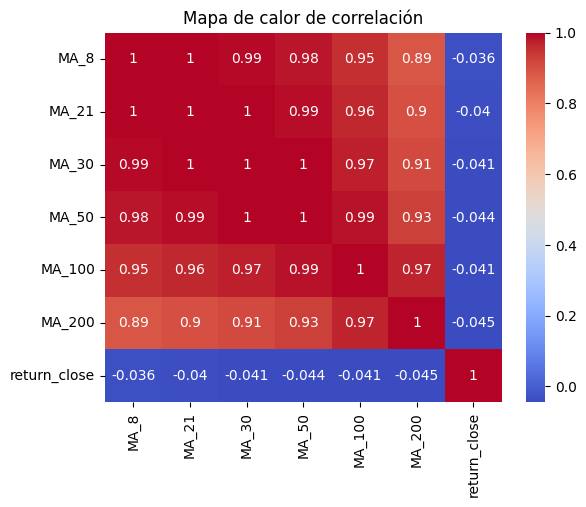

In [115]:
# Crear un mapa de calor de correlación
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Configurar el título del gráfico
plt.title('Mapa de calor de correlación')

# Mostrar el gráfico
plt.show()

In [116]:
# Máscara booleana 'positive_returns'
data['positive_returns'] = data['return_close'] > 0

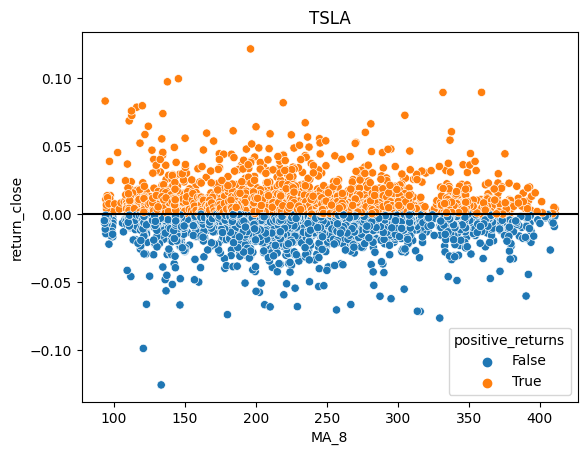

In [117]:
# Crear el scatterplot
sns.scatterplot(x=data['MA_8'], y=data['return_close'], hue=data['positive_returns'])

# Trazar una línea en y=0
plt.axhline(0, color='black', linestyle='-')

# Mostrar el gráfico
plt.title(f'{ric}')
plt.show()

# 5. Máscaras 1

### 1. Definición

In [118]:
# Definir máscaras
data['MA_UP'] = np.where((data['MA_8'] > data['MA_21']),
                        # (data['MA_21'] > data['MA_30']) &
                        # (data['MA_30'] > data['MA_50']) &
                        # (data['MA_50'] > data['MA_100']) &
                        # (data['MA_100'] > data['MA_200']),
                        True,
                        False)

data['MA_DOWN'] = np.where((data['MA_8'] < data['MA_21']),
                        # (data['MA_21'] < data['MA_30']) &
                        # (data['MA_30'] < data['MA_50']) &
                        # (data['MA_50'] < data['MA_100']) &
                        # (data['MA_100'] < data['MA_200']),
                        True,
                        False)

### 2. Retornos agregados

Filtrados por las máscaras

In [119]:
return_agg = data['return_close'][data['MA_UP']].sum() - data['return_close'][data['MA_DOWN']].sum()
return_agg

3.3013052434307797

Retorno del periodo

In [120]:
return_period = data['close'].iloc[-1]/data['close'].iloc[0] - 1
return_period

1.5067662816830407

### 3. Gráfico

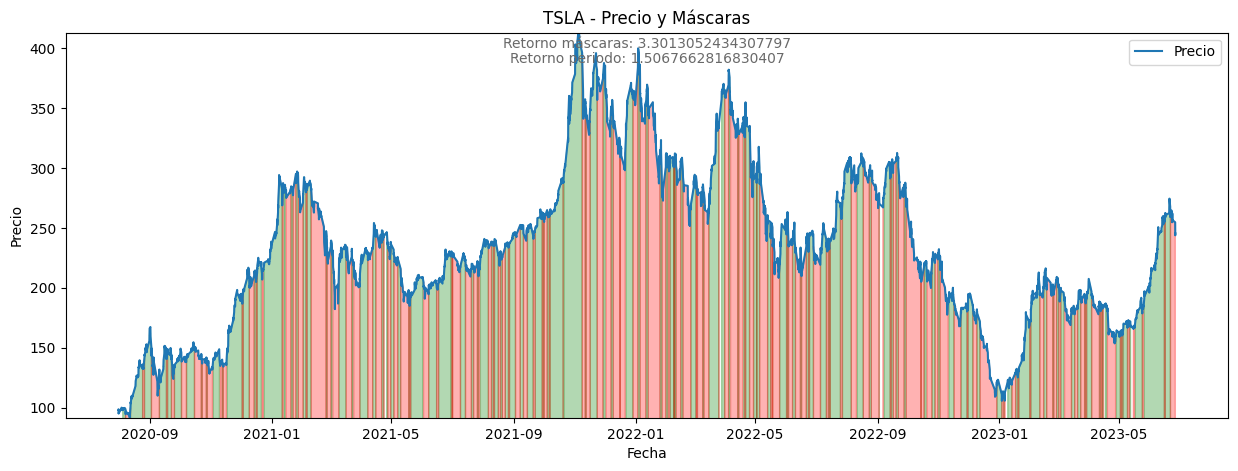

In [121]:
# Graficar el precio y las máscaras
plt.figure(figsize=(15, 5))
plt.plot(data['close'], label='Precio')

# Rellenar el área entre la línea y el eje x cuando 'MA_UP' es igual a 1
plt.fill_between(data.index, data['close'], where=data['MA_UP'], color='green', alpha=0.3)
plt.fill_between(data.index, data['close'], where=data['MA_DOWN'], color='red', alpha=0.3)

plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title(f'{ric} - Precio y Máscaras')
plt.ylim(data['close'].min(), data['close'].max())
plt.text(x=0.5, y=0.99, s=f'Retorno máscaras: {return_agg}', transform=plt.gca().transAxes,
                fontsize=10, va='top', ha='center', color='dimgray')
plt.text(x=0.5, y=0.95, s=f'Retorno periodo: {return_period}', transform=plt.gca().transAxes,
                fontsize=10, va='top', ha='center', color='dimgray')
plt.legend()
plt.show()

# 6. Derivadas

### 1. Cáclulo

In [122]:
# Calcular las derivadas
for ma in medias_moviles:
    columna_ma = 'MA_' + str(ma)
    columna_derivada = 'Derivada_' + str(ma)
    data[columna_derivada] = data[columna_ma].diff()

data.loc[:, 'Derivada_8':'Derivada_200'].describe()

Derivada_8  Derivada_21  Derivada_30  Derivada_50  Derivada_100  \
count  5083.000000  5070.000000  5061.000000  5041.000000   4991.000000   
mean      0.030771     0.031563     0.032142     0.032220      0.028703   
std       1.227521     0.766077     0.642858     0.510801      0.379593   
min      -6.597824    -3.273333    -2.312555    -1.667101     -1.006597   
25%      -0.630505    -0.399638    -0.347167    -0.287466     -0.196701   
50%       0.047915     0.054389     0.034920     0.033933      0.018000   
75%       0.713128     0.481047     0.405778     0.333433      0.232108   
max       7.131752     3.404619     2.364022     2.098578      1.384771   

       Derivada_200  
count   4891.000000  
mean       0.019564  
std        0.268571  
min       -0.695217  
25%       -0.179201  
50%        0.022367  
75%        0.202034  
max        0.779817

In [123]:
data

open        high         low       close  \
Datetime                                                                    
2020-07-31 09:30:00-04:00  100.517334  100.620003   97.003334   97.921333   
2020-07-31 10:30:00-04:00   97.863663   98.893326   97.333336   98.667336   
2020-07-31 11:30:00-04:00   98.729996   98.933334   95.866669   96.854004   
2020-07-31 12:30:00-04:00   96.866669   96.923325   95.000000   96.364662   
2020-07-31 13:30:00-04:00   96.354759   96.453484   94.793335   95.096069   
...                               ...         ...         ...         ...   
2023-06-23 15:30:00-04:00  255.449997  257.920013  254.679993  256.549988   
2023-06-26 09:30:00-04:00  250.065002  258.369995  250.000000  254.720001   
2023-06-26 10:30:00-04:00  254.729996  255.100006  248.529999  249.320007   
2023-06-26 11:30:00-04:00  249.300003  251.190002  242.649994  243.839996   
2023-06-26 12:30:00-04:00  243.820007  246.630005  243.130005  245.465897   

                           return_close        MA_8       MA_21       MA_30  \
Datetime                                                                      
2020-07-31 09:30:00-04:00           NaN         NaN         NaN         NaN   
2020-07-31 10:30:00-04:00      0.007618         NaN         NaN         NaN   
2020-07-31 11:30:00-04:00     -0.018378         NaN         NaN         NaN   
2020-07-31 12:30:00-04:00     -0.005052         NaN         NaN         NaN   
2020-07-31 13:30:00-04:00     -0.013165         NaN         NaN         NaN   
...                                 ...         ...         ...         ...   
2023-06-23 15:30:00-04:00      0.004345  258.745623  260.993891  262.881596   
2023-06-26 09:30:00-04:00     -0.007133  257.511873  260.371573  262.707267   
2023-06-26 10:30:00-04:00     -0.021200  256.834373  259.659669  262.333267   
2023-06-26 11:30:00-04:00     -0.021980  255.216873  258.799516  261.713266   
2023-06-26 12:30:00-04:00      0.006668  253.313234  258.150750  261.072710   

                                MA_50      MA_100      MA_200  \
Datetime                                                        
2020-07-31 09:30:00-04:00         NaN         NaN         NaN   
2020-07-31 10:30:00-04:00         NaN         NaN         NaN   
2020-07-31 11:30:00-04:00         NaN         NaN         NaN   
2020-07-31 12:30:00-04:00         NaN         NaN         NaN   
2020-07-31 13:30:00-04:00         NaN         NaN         NaN   
...                               ...         ...         ...   
2023-06-23 15:30:00-04:00  260.901197  247.406582  216.538085   
2023-06-26 09:30:00-04:00  260.820199  247.804982  216.970085   
2023-06-26 10:30:00-04:00  260.606629  248.158482  217.377435   
2023-06-26 11:30:00-04:00  260.316429  248.425640  217.753135   
2023-06-26 12:30:00-04:00  260.065947  248.690634  218.140514   

                           positive_returns  MA_UP  MA_DOWN  Derivada_8  \
Datetime                                                                  
2020-07-31 09:30:00-04:00             False  False    False         NaN   
2020-07-31 10:30:00-04:00              True  False    False         NaN   
2020-07-31 11:30:00-04:00             False  False    False         NaN   
2020-07-31 12:30:00-04:00             False  False    False         NaN   
2020-07-31 13:30:00-04:00             False  False    False         NaN   
...                                     ...    ...      ...         ...   
2023-06-23 15:30:00-04:00              True  False     True   -0.804989   
2023-06-26 09:30:00-04:00             False  False     True   -1.233749   
2023-06-26 10:30:00-04:00             False  False     True   -0.677500   
2023-06-26 11:30:00-04:00             False  False     True   -1.617500   
2023-06-26 12:30:00-04:00              True  False     True   -1.903639   

                           Derivada_21  Derivada_30  Derivada_50  \
Datetime                                                           
2020-07-31 09:30:00-04:00          NaN       

### 2. Plots

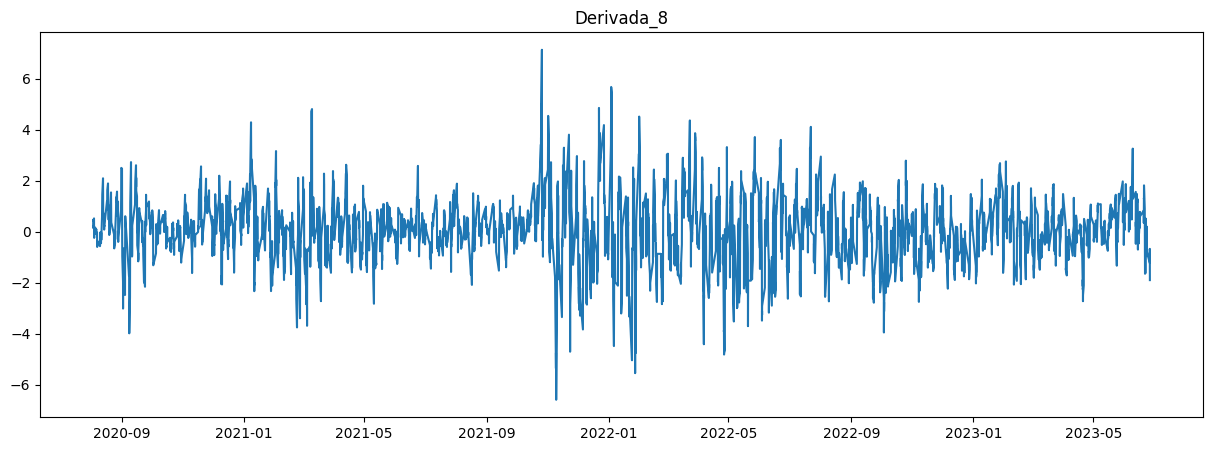

In [124]:
# Plot derivada
ma = 8

plt.figure(figsize=(15,5))
plt.plot(data[f'Derivada_{ma}'])

plt.title(f'Derivada_{ma}')
plt.show()

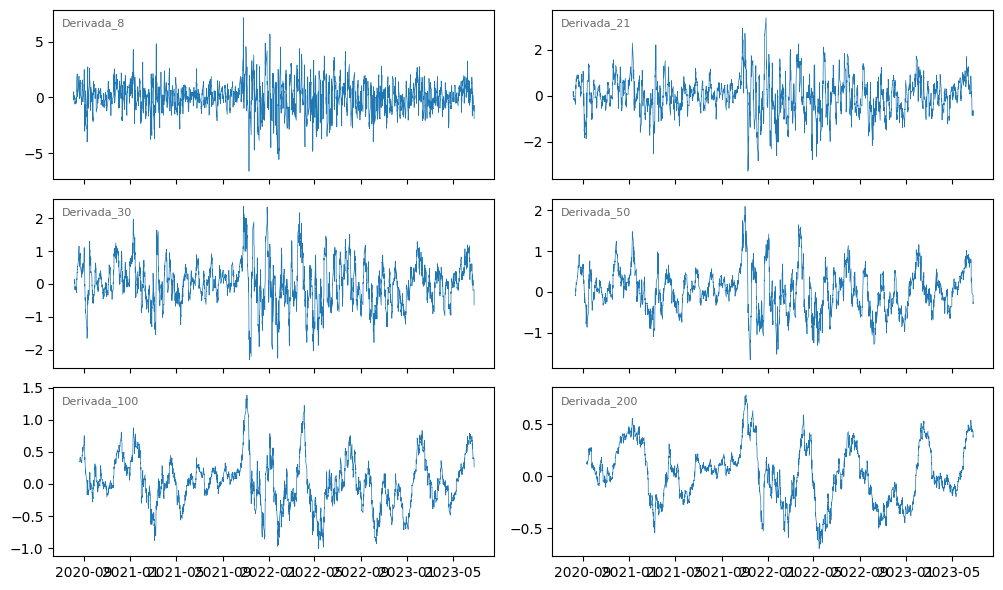

In [125]:
# Polt derivadas

# Filtrar las columnas por el nombre que contiene "Derivada"
columnas_derivadas = data.filter(like='Derivada')

# Obtener el número de derivadas de las medias móviles
num_derivadas = len(columnas_derivadas.columns)

# Calcular el número de filas y columnas para la cuadrícula de subplots
num_filas = (num_derivadas + 1) // 2
num_columnas = 2

# Crear una figura y una cuadrícula de subplots con dos columnas
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(10, 6), sharex=True)

# Aplanar el arreglo de subplots para iterar sobre ellos
axs = axs.flatten()

# Iterar sobre las columnas de derivadas de las medias móviles y agregarlas a los subplots
for i, columna in enumerate(columnas_derivadas.columns):
    axs[i].plot(data[columna], linewidth=0.5)  # Ajustar el grosor de la línea
    axs[i].text(0.02, 0.95, columna, transform=axs[i].transAxes,
                fontsize=8, va='top', ha='left', color='dimgray')

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

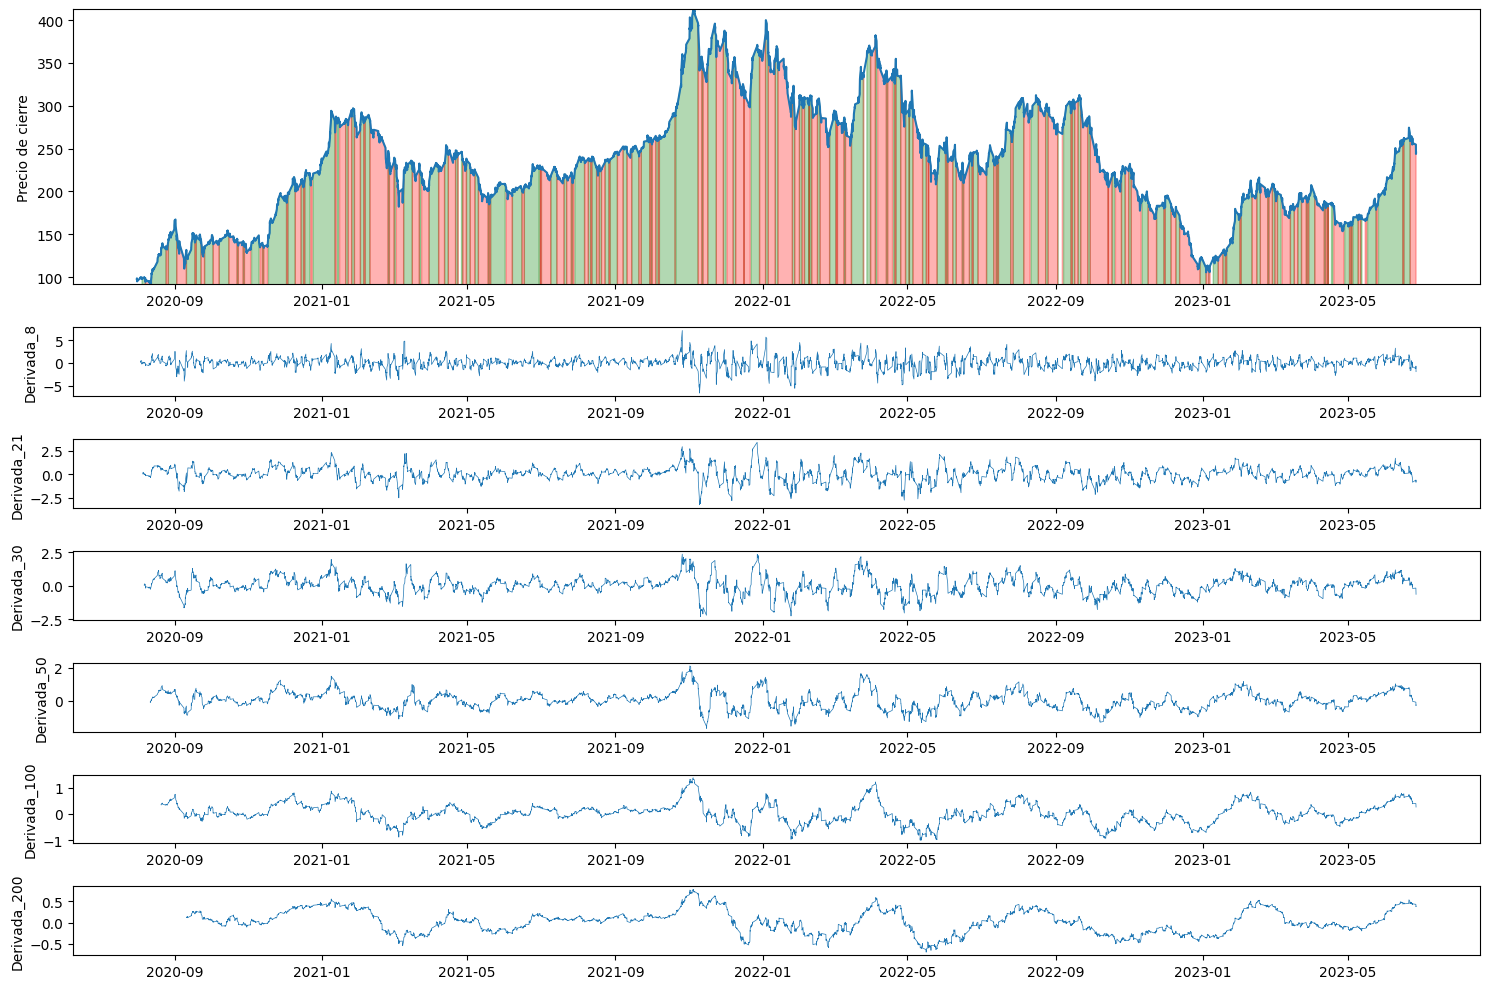

In [126]:
# Grafico del precio con máscaras y derivadas

# Filtrar las columnas por el nombre que contiene "Derivada"
columnas_derivadas = data.filter(like='Derivada')

# Obtener el número de derivadas de las medias móviles
num_derivadas = len(columnas_derivadas.columns)

# Crear una figura y una cuadrícula personalizada
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(num_derivadas + 1, 1, height_ratios=[4] + [1] * num_derivadas)

# Trazar el precio de cierre en el primer subplot con altura mayor
ax1 = plt.subplot(gs[0])
ax1.plot(data['close'])

# Rellenar el área entre la línea y el eje x cuando 'MA_UP' es igual a 1
ax1.fill_between(data.index, data['close'], where=data['MA_UP'], color='green', alpha=0.3)
ax1.fill_between(data.index, data['close'], where=data['MA_DOWN'], color='red', alpha=0.3)

ax1.set_ylabel('Precio de cierre')
ax1.set_ylim(data['close'].min(), data['close'].max())

# Iterar sobre las columnas de derivadas de las medias móviles y agregarlas a los subplots individuales
for i, columna in enumerate(columnas_derivadas.columns):
    ax = plt.subplot(gs[i + 1], sharex=ax1)
    ax.plot(data.index, data[columna], linewidth=0.5)  # Ajustar el grosor de la línea
    ax.set_ylabel(columna)

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### 3. Matriz de correlación

In [127]:
# Filtrar las columnas que contienen 'Derivada' y la columna 'close'
columnas_derivadas = data.filter(like='Derivada')
columnas_seleccionadas = columnas_derivadas.columns.tolist() + ['return_close']

# Calcular la matriz de correlación
correlation_matrix = data[columnas_seleccionadas].corr()

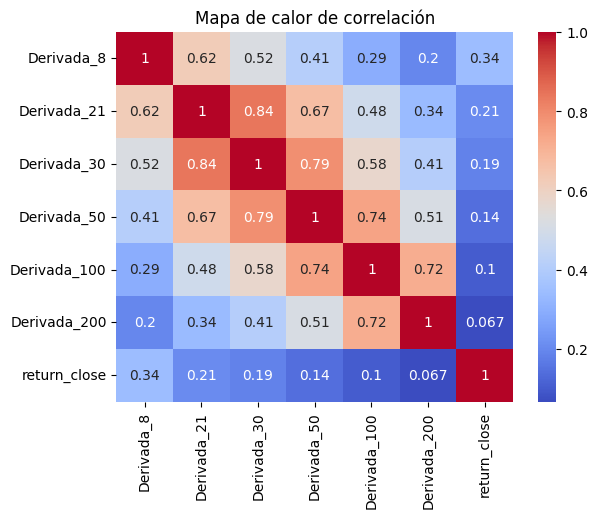

In [128]:
# Crear un mapa de calor de correlación
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Configurar el título del gráfico
plt.title('Mapa de calor de correlación')

# Mostrar el gráfico
plt.show()

### 4. Scatter plot

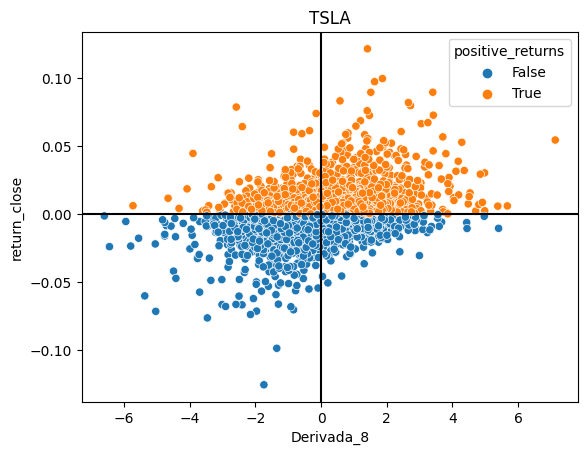

In [129]:
# Crear el scatterplot
sns.scatterplot(x=data['Derivada_8'], y=data['return_close'], hue=data['positive_returns'])

# Trazar una línea en y=0
plt.axhline(0, color='black', linestyle='-')

# Trazar una línea en x=0
plt.axvline(0, color='black', linestyle='-')

# Mostrar el gráfico
plt.title(f'{ric}')
plt.show()

### 5. Regresión lineal

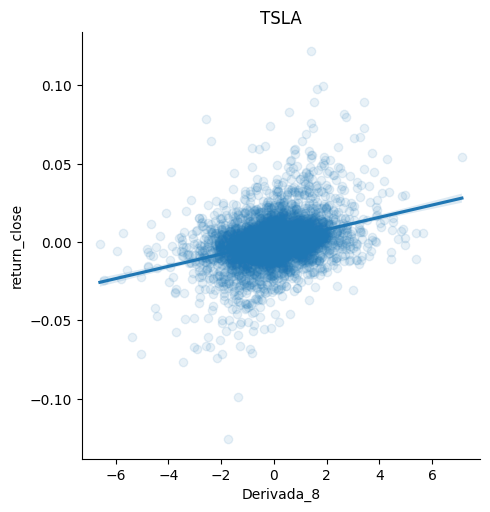

In [130]:
# Regresión lineal
sns.lmplot(data=data, x='Derivada_8', y='return_close', scatter_kws={'alpha': 0.1})
plt.title(f'{ric}')

plt.show()

### 6. Estimación de Densidad de Kernel

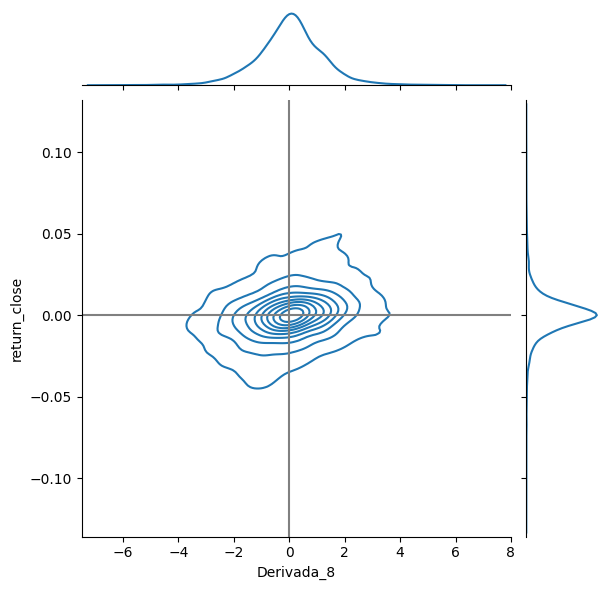

In [131]:
# KDE

sns.jointplot(x=data['Derivada_8'], y=data['return_close'], kind='kde');

# Trazar una línea en y=0
plt.axhline(0, color='gray', linestyle='-')

# Trazar una línea en x=0
plt.axvline(0, color='gray', linestyle='-')

plt.show()

# 7. Máscaras 2

### 1. Definición

In [132]:
# Definir máscaras
data['MA_UP'] = np.where(#(data['MA_8'] > data['MA_21']) &
                        # (data['MA_21'] > data['MA_30']) &
                        # (data['MA_30'] > data['MA_50']) &
                        # (data['MA_50'] > data['MA_100']) &
                        # (data['MA_100'] > data['MA_200']) &
                        (data['Derivada_8'] > 0),
                        True,
                        False)

data['MA_DOWN'] = np.where(#(data['MA_8'] < data['MA_21']) &
                        # (data['MA_21'] < data['MA_30']) &
                        # (data['MA_30'] < data['MA_50']) &
                        # (data['MA_50'] < data['MA_100']) &
                        # (data['MA_100'] < data['MA_200']) &
                        (data['Derivada_8'] < 0),
                        True,
                        False)

### 2. Retornos agregados

In [133]:
# Retorno 'MA_UP'
data['return_close'][data['MA_UP']].sum()

9.908396528270549

In [134]:
# Retorno 'MA_DOWN'
data['return_close'][data['MA_DOWN']].sum()

-8.498326476307255

In [135]:
# Retorno agregado
return_agg = data['return_close'][data['MA_UP']].sum() - data['return_close'][data['MA_DOWN']].sum()
return_agg

18.406723004577806

In [136]:
# Retorno del periodo
return_abs = data['close'].iloc[-1]/data['close'].iloc[0] - 1
return_abs

1.5067662816830407

### 3. Gráfica

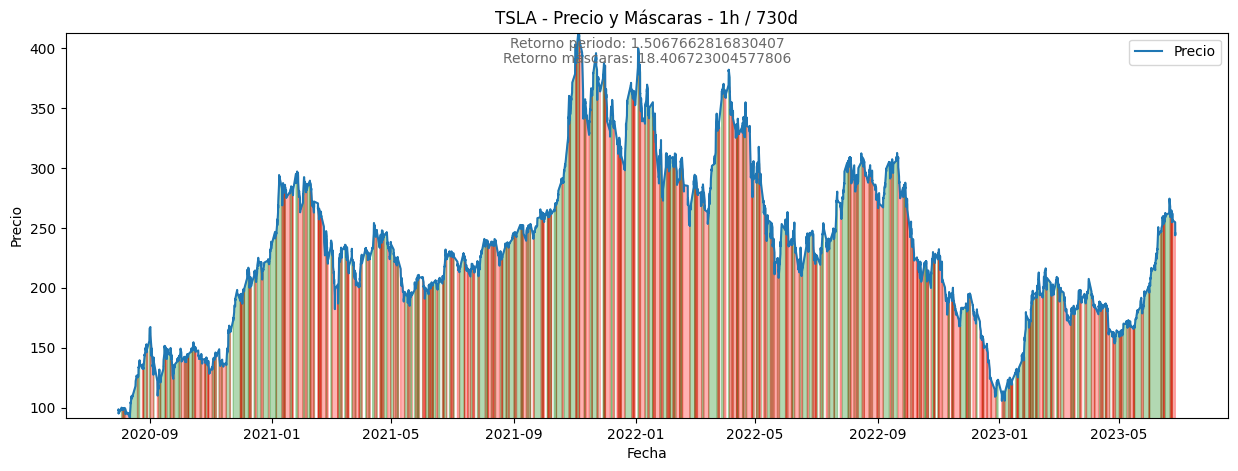

In [137]:
# Graficar el precio y las medias móviles
plt.figure(figsize=(15, 5))
plt.plot(data['close'], label='Precio')

# Rellenar el área entre la línea y el eje x cuando 'MA_UP' es igual a 1
plt.fill_between(data.index, data['close'], where=data['MA_UP'], color='green', alpha=0.3)
plt.fill_between(data.index, data['close'], where=data['MA_DOWN'], color='red', alpha=0.3)

plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title(f'{ric} - Precio y Máscaras - {interval} / {period}')
plt.ylim(data['close'].min(), data['close'].max())
plt.text(x=0.5, y=0.99, s=f'Retorno periodo: {return_period}', transform=plt.gca().transAxes,
                fontsize=10, va='top', ha='center', color='dimgray')
plt.text(x=0.5, y=0.95, s=f'Retorno máscaras: {return_agg}', transform=plt.gca().transAxes,
                fontsize=10, va='top', ha='center', color='dimgray')
plt.legend()
plt.show()

# 8. Estudio de las series obtenidas

In [138]:
# Contar series positivas y numerarlas

# Inicializar variables
serie_actual = 0
series_numeradas = []

# Recorrer el DataFrame con la máscara booleana
for i, estado_actual in enumerate(data['MA_UP']):
    if i > 0 and estado_actual and not data['MA_UP'].iloc[i-1]:
        # Si el estado cambia a True, se inicia una nueva serie
        serie_actual += 1
    # Si el estado es False, el número de serie es 0
    serie = serie_actual if estado_actual else 0
    # Guardar el número de serie en la columna 'UP_series'
    series_numeradas.append(serie)

# Agregar la columna 'UP_series' al DataFrame
data['UP_series'] = series_numeradas

In [139]:
# Visualizar series
grouped_UP = data[['UP_series','return_close']].groupby(data['UP_series']).agg('sum')
print(grouped_UP['return_close'][1:].sum())
print(grouped_UP)


9.908396528270549
           UP_series  return_close
UP_series                         
0                  0     -8.484549
1                  7      0.004391
2                  2      0.008570
3                 15      0.001095
4                 24      0.004456
...              ...           ...
350              350     -0.001483
351             5616      0.033646
352              704      0.003032
353              353      0.006084
354              354      0.015247

[355 rows x 2 columns]


In [140]:
data.head(30)

open        high        low       close  \
Datetime                                                                   
2020-07-31 09:30:00-04:00  100.517334  100.620003  97.003334   97.921333   
2020-07-31 10:30:00-04:00   97.863663   98.893326  97.333336   98.667336   
2020-07-31 11:30:00-04:00   98.729996   98.933334  95.866669   96.854004   
2020-07-31 12:30:00-04:00   96.866669   96.923325  95.000000   96.364662   
2020-07-31 13:30:00-04:00   96.354759   96.453484  94.793335   95.096069   
2020-07-31 14:30:00-04:00   95.099464   96.243324  94.732002   95.694000   
2020-07-31 15:30:00-04:00   95.717331   95.936005  95.213997   95.466667   
2020-08-03 09:30:00-04:00   96.474998   99.333336  96.413994   99.174789   
2020-08-03 10:30:00-04:00   99.209999  100.654007  98.820000   99.567329   
2020-08-03 11:30:00-04:00   99.539665  100.167938  99.173332   99.830666   
2020-08-03 12:30:00-04:00   99.849998  100.440666  99.713310  100.010002   
2020-08-03 13:30:00-04:00  100.017670  100.033463  98.470673   99.070854   
2020-08-03 14:30:00-04:00   99.158669   99.386002  98.585335   98.781937   
2020-08-03 15:30:00-04:00   98.813667   99.150002  98.342575   98.998665   
2020-08-04 09:30:00-04:00  100.171997  101.827339  99.466667   99.603004   
2020-08-04 10:30:00-04:00   99.539330   99.969711  97.694000   97.944489   
2020-08-04 11:30:00-04:00   97.936890   98.873703  97.466667   98.046074   
2020-08-04 12:30:00-04:00   98.000664   98.499199  97.609337   98.157997   
2020-08-04 13:30:00-04:00   98.184669   99.029999  97.985344   98.036667   
2020-08-04 14:30:00-04:00   97.986671   98.445335  97.600044   98.241432   
2020-08-04 15:30:00-04:00   98.328667   99.186005  98.067337   99.083336   
2020-08-05 09:30:00-04:00   99.597328   99.669334  97.887337   98.733978   
2020-08-05 10:30:00-04:00   98.683998   99.765663  98.403336   98.906105   
2020-08-05 11:30:00-04:00   98.895996   99.009331  98.400002   98.909668   
2020-08-05 12:30:00-04:00   98.894005   99.333336  98.662666   98.812660   
2020-08-05 13:30:00-04:00   98.898727   99.526665  98.699997   99.430000   
2020-08-05 14:30:00-04:00   99.417999   99.663857  98.845993   99.293610   
2020-08-05 15:30:00-04:00   99.270920   99.339996  98.845459   99.012001   
2020-08-06 09:30:00-04:00   99.371712  100.599998  98.484001   98.874664   
2020-08-06 10:30:00-04:00   98.933334   99.888664  98.579994   99.410004   

                           return_close       MA_8      MA_21    MA_30  MA_50  \
Datetime                                                                        
2020-07-31 09:30:00-04:00           NaN        NaN        NaN      NaN    NaN   
2020-07-31 10:30:00-04:00      0.007618        NaN        NaN      NaN    NaN   
2020-07-31 11:30:00-04:00     -0.018378        NaN        NaN      NaN    NaN   
2020-07-31 12:30:00-04:00     -0.005052        NaN        NaN      NaN    NaN   
2020-07-31 13:30:00-04:00     -0.013165        NaN        NaN      NaN    NaN   
2020-07-31 14:30:00-04:00      0.006288        NaN        NaN      NaN    NaN   
2020-07-31 15:30:00-04:00     -0.002376        NaN        NaN      NaN    NaN   
2020-08-03 09:30:00-04:00      0.038842  96.904858        NaN      NaN    NaN   
2020-08-03 10:30:00-04:00      0.003958  97.110607        NaN      NaN    NaN   
2020-08-03 11:30:00-04:00      0.002645  97.256023        NaN      NaN    NaN   
2020-08-03 12:30:00-04:00      0.001796  97.650523        NaN      NaN    NaN   
2020-08-03 13:30:00-04:00     -0.009391  97.988797        NaN      NaN    NaN   
2020-08-03 14:30:00-04:00     -0.002916  98.449531        NaN      NaN    NaN   
2020-08-03 15:30:00-04:00      0.002194  98.862614        NaN      NaN    NaN   
2020-08-04 09:30:00-04:00      0.006105  99.379656        NaN      NaN    NaN   
2020-08-04 10:30:00-04:00     -0.016651  99.225868        NaN      NaN    NaN   
2020-08-04 11:30:00-04:00      0.001037  99.035711        NaN      NaN    NaN   
2020-08-04 12:30:00-04:00      0.001142  98.826628        NaN

# 9. Plotly

### 1. Plots

In [141]:
# Definir los colores para las medias móviles
colores = ['orange', 'blue', 'grey', 'green', 'purple', 'red']

# Crear la figura de Plotly
fig = go.Figure()

# Agregar el precio al gráfico
fig.add_trace(go.Scatter(x=data.index, y=data['close'], name='Precio', line=dict(color='blue', width=1)))

# Agregar las medias móviles al gráfico con colores diferentes
for ma, color in zip(medias_moviles, colores):
    columna = 'MA_' + str(ma)
    fig.add_trace(go.Scatter(x=data.index, y=data[columna], name='MA ' + str(ma), line=dict(color=color, width=0.5)))

# Personalizar el diseño del gráfico
fig.update_layout(
    title=f'{ric} - Precio y Medias Móviles',
    xaxis_title='Fecha',
    yaxis_title='Precio',
    hovermode='x'
)

# Mostrar el gráfico interactivo
fig.show()

In [142]:
from plotly.subplots import make_subplots

# Filtrar las columnas por el nombre que contiene "Derivada"
columnas_derivadas = data.filter(like='Derivada')

# Obtener el número de derivadas de las medias móviles
num_derivadas = len(columnas_derivadas.columns)

# Definir la altura del primer gráfico y el resto de los gráficos
row_heights = [0.8] + [0.2] * num_derivadas

# Crear los subplots con eje x compartido
fig = make_subplots(rows=num_derivadas + 1, cols=1, shared_xaxes=True, vertical_spacing=0.05, row_heights=row_heights)

# Trazar el precio de cierre en el primer subplot con altura mayor
fig.add_trace(go.Scatter(x=data.index, y=data['close'], name='Precio de cierre'), row=1, col=1)

fig.update_layout(height=800, width=1000, title_text=f'{ric} - Precio y Derivadas')

# Iterar sobre las columnas de derivadas de las medias móviles y agregarlas a los subplots individuales
for i, columna in enumerate(columnas_derivadas.columns):
    fig.add_trace(go.Scatter(x=data.index, y=data[columna], name=columna), row=i+2, col=1)

fig.show()

In [143]:
# Guardar dataframe
# data.to_csv(f'df_{ric}.csv')

# 10. Continuara..

In [144]:
# Plotly con máscaras

# Crear una figura
fig = go.Figure()

# Agregar la línea principal
fig.add_trace(go.Scatter(x=data.index, y=data['close'], mode='lines', name='Close'))

# Rellenar el área entre la línea y el eje x cuando 'MA_UP' es igual a 1
fig.add_trace(go.Scatter(x=data.index, y=data['close'], fill='tozeroy', fillcolor='green',
                         line=dict(color='green'), name='MA_UP',
                         connectgaps=True, showlegend=False,
                         hoverinfo='skip'))
fig.update_traces(visible='legendonly', selector=dict(fillcolor='green', y=data['MA_UP'] == 1))

# Rellenar el área entre la línea y el eje x cuando 'MA_DOWN' es igual a 1
fig.add_trace(go.Scatter(x=data.index, y=data['close'], fill='tozeroy', fillcolor='red',
                         line=dict(color='red'), name='MA_DOWN',
                         connectgaps=True, showlegend=False,
                         hoverinfo='skip'))
fig.update_traces(visible='legendonly', selector=dict(fillcolor='red', y=data['MA_DOWN'] == 1))

# Configurar el diseño del gráfico
fig.update_layout(title='Gráfico de precios', xaxis_title='Fecha', yaxis_title='Precio de cierre')

# Mostrar el gráfico
fig.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
# Slicing por fechas

# Año, mes y día de inicio y fin
start_year, start_month, start_day = 2023, 5, 23
end_year, end_month, end_day = 2023, 5, 26

# Convertir a objetos datetime
start_date = datetime.datetime(start_year, start_month, start_day)
end_date = datetime.datetime(end_year, end_month, end_day)

# Obtener los índices correspondientes a las fechas de inicio y fin
start_index = data.index.get_loc(start_date)
end_index = data.index.get_loc(end_date)

plt.figure(figsize=(15, 5))
plt.plot(data.index[start_index:end_index], data['close'][start_index:end_index])

# Rellenar el área entre la línea y el eje x cuando 'MA_UP' es igual a 1
plt.fill_between(data.index[start_index:end_index], data['close'][start_index:end_index], where=data['MA_UP'][start_index:end_index], color='green', alpha=0.3)
# Rellenar el área entre la línea y el eje x cuando 'MA_DOWN' es igual a 1
plt.fill_between(data.index[start_index:end_index], data['close'][start_index:end_index], where=data['MA_DOWN'][start_index:end_index], color='red', alpha=0.3)

plt.title(f'Gráfico de precios para {ric} ({start_date.strftime("%Y/%m/%d")} - {end_date.strftime("%Y/%m/%d")})')

plt.ylim(data['close'][start_index:end_index].min(), data['close'][start_index:end_index].max())

plt.show()

C:\Users\OY\AppData\Local\Temp\ipykernel_18668\926199608.py:12: FutureWarning:

Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.



KeyError: datetime.datetime(2023, 5, 23, 0, 0)